In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.model import *

from sklearn.model_selection import KFold

In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed_mono.csv" in f]
files

['MS014_processed_mono.csv',
 'MS001_processed_mono.csv',
 'MS008_processed_mono.csv',
 'DSM_processed_mono.csv']

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Total samples: 62, Initial regularization: 0.00e+00
Loss: 10.007, Residuals: -0.291
Loss: 4.349, Residuals: -0.088
Loss: 2.586, Residuals: 0.038
Loss: 2.315, Residuals: 0.003
Loss: 2.018, Residuals: -0.017
Loss: 1.661, Residuals: -0.006
Loss: 1.594, Residuals: 0.005
Loss: 1.482, Residuals: 0.005
Loss: 1.446, Residuals: 0.016
Loss: 1.385, Residuals: 0.008
Loss: 1.340, Residuals: -0.002
Loss: 1.329, Residuals: 0.011
Loss: 1.310, Residuals: 0.005
Loss: 1.281, Residuals: -0.006
Loss: 1.280, Residuals: -0.004
Loss: 1.279, Residuals: -0.006
Loss: 1.267, Residuals: -0.010
Loss: 1.266, Residuals: -0.012
Loss: 1.261, Residuals: -0.014
Loss: 1.253, Residuals: -0.016
Loss: 1.251, Residuals: -0.014
Loss: 1.240, Residuals: -0.019
Loss: 1.240, Residuals: -0.018
Loss: 1.239, Residuals: -0.018
Loss: 1.230, Residuals: -0.022
Loss: 1.229, Residuals: -0.022
Loss: 1.228, Residuals: -0.021
Loss: 1.218, Residuals: -0.025
Loss: 1.218, Residuals: -0.024
Loss: 1.209, Residuals: -0.027
Loss: 1.208, Residuals: -

Loss: 1.055, Residuals: -0.027
Loss: 1.054, Residuals: -0.028
Loss: 1.054, Residuals: -0.028
Loss: 1.054, Residuals: -0.028
Loss: 1.054, Residuals: -0.028
Loss: 1.054, Residuals: -0.028
Loss: 1.054, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.053, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.052, Residuals: -0.028
Loss: 1.051, Residuals: -0.028
Loss: 1.051, Residuals: -0.028
Loss: 1.051, Residuals: -0.028
Loss: 1.051, Residuals: -0.028
Loss: 1.051, Residuals: -0.028
Evidence -44.820
Updating hyper-paramet

Loss: 1.261, Residuals: -0.009
Loss: 1.256, Residuals: -0.011
Loss: 1.246, Residuals: -0.015
Loss: 1.246, Residuals: -0.014
Loss: 1.245, Residuals: -0.013
Loss: 1.236, Residuals: -0.018
Loss: 1.235, Residuals: -0.017
Loss: 1.235, Residuals: -0.017
Loss: 1.229, Residuals: -0.020
Loss: 1.229, Residuals: -0.019
Loss: 1.224, Residuals: -0.022
Loss: 1.223, Residuals: -0.021
Loss: 1.218, Residuals: -0.024
Loss: 1.218, Residuals: -0.024
Loss: 1.214, Residuals: -0.026
Loss: 1.214, Residuals: -0.026
Loss: 1.210, Residuals: -0.028
Loss: 1.209, Residuals: -0.028
Loss: 1.207, Residuals: -0.028
Loss: 1.207, Residuals: -0.028
Loss: 1.205, Residuals: -0.029
Loss: 1.205, Residuals: -0.029
Loss: 1.203, Residuals: -0.029
Loss: 1.203, Residuals: -0.029
Loss: 1.201, Residuals: -0.029
Loss: 1.201, Residuals: -0.030
Loss: 1.200, Residuals: -0.030
Loss: 1.197, Residuals: -0.031
Loss: 1.197, Residuals: -0.031
Loss: 1.196, Residuals: -0.030
Loss: 1.196, Residuals: -0.030
Loss: 1.194, Residuals: -0.030
Loss: 1.

Total samples: 64, Updated regularization: 2.05e-01
Loss: 206.813, Residuals: -0.002
Loss: 205.373, Residuals: -0.011
Loss: 204.979, Residuals: -0.011
Loss: 204.739, Residuals: -0.010
Loss: 204.348, Residuals: -0.011
Loss: 204.283, Residuals: -0.012
Loss: 203.764, Residuals: -0.012
Loss: 203.746, Residuals: -0.012
Optimization terminated successfully.
Evidence 1051.186
Updating hyper-parameters...
Total samples: 64, Updated regularization: 2.37e-01
Loss: 243.568, Residuals: -0.011
Loss: 243.223, Residuals: -0.016
Loss: 242.881, Residuals: -0.018
Loss: 242.764, Residuals: -0.015
Loss: 242.570, Residuals: -0.016
Loss: 242.290, Residuals: -0.017
Loss: 242.276, Residuals: -0.017
Optimization terminated successfully.
Evidence 1067.029
Updating hyper-parameters...
Total samples: 64, Updated regularization: 2.49e-01
Loss: 252.523, Residuals: -0.016
Loss: 252.385, Residuals: -0.018
Loss: 252.136, Residuals: -0.018
Loss: 251.979, Residuals: -0.017
Loss: 251.959, Residuals: -0.018
Optimization t

Loss: 1.271, Residuals: 0.004
Loss: 1.265, Residuals: 0.003
Loss: 1.257, Residuals: 0.001
Loss: 1.242, Residuals: -0.003
Loss: 1.237, Residuals: -0.003
Loss: 1.228, Residuals: -0.006
Loss: 1.213, Residuals: -0.013
Loss: 1.213, Residuals: -0.012
Loss: 1.212, Residuals: -0.011
Loss: 1.208, Residuals: -0.013
Loss: 1.201, Residuals: -0.017
Loss: 1.201, Residuals: -0.018
Loss: 1.193, Residuals: -0.021
Loss: 1.193, Residuals: -0.021
Loss: 1.193, Residuals: -0.021
Loss: 1.188, Residuals: -0.022
Loss: 1.188, Residuals: -0.023
Loss: 1.184, Residuals: -0.024
Loss: 1.184, Residuals: -0.023
Loss: 1.181, Residuals: -0.024
Loss: 1.181, Residuals: -0.024
Loss: 1.178, Residuals: -0.025
Loss: 1.172, Residuals: -0.027
Loss: 1.172, Residuals: -0.026
Loss: 1.172, Residuals: -0.026
Loss: 1.170, Residuals: -0.027
Loss: 1.169, Residuals: -0.026
Loss: 1.166, Residuals: -0.027
Loss: 1.166, Residuals: -0.028
Loss: 1.164, Residuals: -0.028
Loss: 1.164, Residuals: -0.027
Loss: 1.162, Residuals: -0.027
Loss: 1.162

Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Loss: 1.180, Residuals: -0.035
Evidence -44.191
Updating hyper-parameters...
Total samples: 63, Updated regularization: 3.43e-02
Loss: 31.101, Residuals: -0.028
Loss: 29.124, Residuals: -0.006
Loss: 29.006, Residuals: -0.012
Loss: 28.788, Residuals: -0.011
Loss: 28.460, Residuals: -0.007
Loss: 28.451, Residuals: -0.009
Optimization terminated succ

Loss: 117.343, Residuals: -0.017
Loss: 117.236, Residuals: -0.019
Loss: 117.232, Residuals: -0.019
Optimization terminated successfully.
Evidence 982.487
Updating hyper-parameters...
Total samples: 66, Updated regularization: 5.43e-03
Loss: 216.585, Residuals: -0.016
Loss: 215.975, Residuals: -0.020
Loss: 215.650, Residuals: -0.024
Loss: 215.601, Residuals: -0.025
Loss: 215.511, Residuals: -0.025
Loss: 215.365, Residuals: -0.026
Loss: 215.360, Residuals: -0.026
Optimization terminated successfully.
Evidence 1069.826
Updating hyper-parameters...
Total samples: 66, Updated regularization: 4.72e-03
Loss: 248.816, Residuals: -0.029
Loss: 248.666, Residuals: -0.029
Loss: 248.488, Residuals: -0.030
Loss: 248.472, Residuals: -0.031
Loss: 247.885, Residuals: -0.031
Loss: 247.866, Residuals: -0.031
Optimization terminated successfully.
Evidence 1082.204
Updating hyper-parameters...
Total samples: 66, Updated regularization: 4.35e-03
Loss: 256.060, Residuals: -0.031
Loss: 255.970, Residuals: -0.

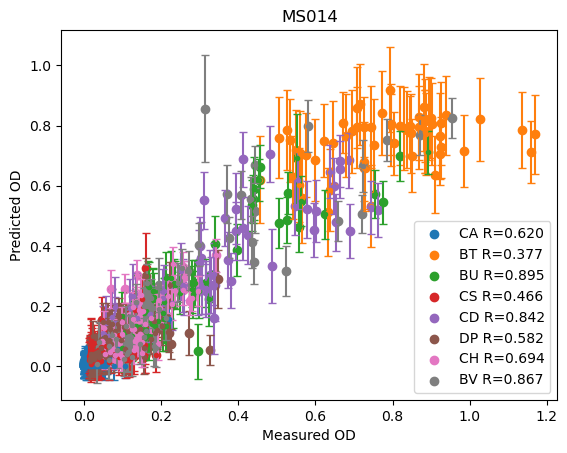

Total samples: 66, Initial regularization: 0.00e+00
Loss: 10.701, Residuals: -0.309
Loss: 5.018, Residuals: -0.041
Loss: 3.724, Residuals: 0.002
Loss: 2.943, Residuals: 0.074
Loss: 2.378, Residuals: 0.039
Loss: 2.004, Residuals: 0.026
Loss: 1.964, Residuals: 0.057
Loss: 1.890, Residuals: 0.050
Loss: 1.768, Residuals: 0.038
Loss: 1.714, Residuals: 0.022
Loss: 1.629, Residuals: 0.015
Loss: 1.620, Residuals: 0.029
Loss: 1.554, Residuals: 0.018
Loss: 1.553, Residuals: 0.021
Loss: 1.543, Residuals: 0.020
Loss: 1.525, Residuals: 0.015
Loss: 1.518, Residuals: 0.018
Loss: 1.506, Residuals: 0.014
Loss: 1.486, Residuals: 0.008
Loss: 1.485, Residuals: 0.008
Loss: 1.476, Residuals: 0.004
Loss: 1.461, Residuals: -0.004
Loss: 1.460, Residuals: -0.003
Loss: 1.460, Residuals: -0.003
Loss: 1.459, Residuals: -0.004
Loss: 1.457, Residuals: -0.004
Loss: 1.454, Residuals: -0.006
Loss: 1.449, Residuals: -0.009
Loss: 1.449, Residuals: -0.007
Loss: 1.443, Residuals: -0.011
Loss: 1.443, Residuals: -0.012
Loss:

Loss: 1.392, Residuals: -0.028
Loss: 1.391, Residuals: -0.028
Loss: 1.391, Residuals: -0.028
Loss: 1.391, Residuals: -0.028
Loss: 1.391, Residuals: -0.028
Loss: 1.391, Residuals: -0.028
Loss: 1.391, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.390, Residuals: -0.028
Loss: 1.389, Residuals: -0.029
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Loss: 1.389, Residuals: -0.028
Evidence -48.954
Updating hyper-parameters...
Total samples: 67, Updat

Total samples: 69, Updated regularization: 1.19e-02
Loss: 274.121, Residuals: -0.019
Optimization terminated successfully.
Evidence 1130.615
Pass count  1
Total samples: 67, Initial regularization: 0.00e+00
Loss: 10.925, Residuals: -0.321
Loss: 5.302, Residuals: -0.022
Loss: 4.929, Residuals: -0.053
Loss: 4.241, Residuals: -0.041
Loss: 3.026, Residuals: -0.009
Loss: 2.456, Residuals: 0.035
Loss: 2.279, Residuals: 0.029
Loss: 2.023, Residuals: 0.030
Loss: 1.974, Residuals: 0.012
Loss: 1.888, Residuals: 0.010
Loss: 1.757, Residuals: 0.010
Loss: 1.750, Residuals: 0.028
Loss: 1.690, Residuals: 0.018
Loss: 1.664, Residuals: 0.022
Loss: 1.621, Residuals: 0.015
Loss: 1.570, Residuals: 0.004
Loss: 1.558, Residuals: 0.002
Loss: 1.554, Residuals: 0.003
Loss: 1.547, Residuals: 0.001
Loss: 1.545, Residuals: 0.000
Loss: 1.540, Residuals: -0.002
Loss: 1.538, Residuals: -0.000
Loss: 1.527, Residuals: -0.005
Loss: 1.527, Residuals: -0.005
Loss: 1.524, Residuals: -0.007
Loss: 1.523, Residuals: -0.008
L

Loss: 11.166, Residuals: -0.331
Loss: 5.222, Residuals: -0.063
Loss: 3.777, Residuals: 0.017
Loss: 2.972, Residuals: 0.014
Loss: 2.438, Residuals: 0.009
Loss: 2.240, Residuals: 0.008
Loss: 2.001, Residuals: 0.009
Loss: 1.952, Residuals: 0.016
Loss: 1.863, Residuals: 0.011
Loss: 1.725, Residuals: 0.008
Loss: 1.708, Residuals: 0.028
Loss: 1.678, Residuals: 0.022
Loss: 1.657, Residuals: 0.018
Loss: 1.619, Residuals: 0.011
Loss: 1.571, Residuals: 0.001
Loss: 1.569, Residuals: 0.003
Loss: 1.567, Residuals: 0.003
Loss: 1.563, Residuals: 0.001
Loss: 1.556, Residuals: -0.001
Loss: 1.552, Residuals: -0.004
Loss: 1.544, Residuals: -0.007
Loss: 1.532, Residuals: -0.013
Loss: 1.531, Residuals: -0.012
Loss: 1.524, Residuals: -0.016
Loss: 1.524, Residuals: -0.015
Loss: 1.520, Residuals: -0.017
Loss: 1.519, Residuals: -0.019
Loss: 1.515, Residuals: -0.022
Loss: 1.515, Residuals: -0.022
Loss: 1.512, Residuals: -0.023
Loss: 1.512, Residuals: -0.023
Loss: 1.510, Residuals: -0.024
Loss: 1.507, Residuals:

Loss: 1.505, Residuals: -0.025
Loss: 1.505, Residuals: -0.025
Loss: 1.505, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Loss: 1.504, Residuals: -0.025
Evidence -47.128
Updating hyper-parameters...
Total samples: 68, Updated regularization: 5.38e-01
Loss: 33.454, Residuals: -0.017
Loss: 32.334, Residuals: 0.014
Loss: 32.278, Residuals: 0.008
Optimization terminated successfully.
Evidence 644.027
Updating hyper-parameters...
Total samples: 68, Updated regularization: 5.38e-01
Loss: 125.137, Residuals: 0.006
Loss: 124.200, Residuals: 0.002
Loss: 123.947, Residuals: 0.001
Loss: 123.536, Residuals: 0.001
Loss: 123.140, Residuals: 0.002
Loss: 123.115, R

Loss: 255.961, Residuals: -0.006
Loss: 255.660, Residuals: -0.011
Loss: 255.362, Residuals: -0.012
Loss: 255.343, Residuals: -0.011
Optimization terminated successfully.
Evidence 1082.116
Updating hyper-parameters...
Total samples: 67, Updated regularization: 8.02e-04
Loss: 263.362, Residuals: -0.011
Loss: 263.242, Residuals: -0.014
Loss: 263.143, Residuals: -0.015
Loss: 263.018, Residuals: -0.015
Loss: 263.015, Residuals: -0.015
Optimization terminated successfully.
Evidence 1085.434
Updating hyper-parameters...
Total samples: 67, Updated regularization: 6.97e-04
Loss: 265.242, Residuals: -0.015
Optimization terminated successfully.
Evidence 1086.492
Pass count  1
Total samples: 68, Initial regularization: 0.00e+00
Loss: 10.808, Residuals: -0.351
Loss: 4.892, Residuals: -0.109
Loss: 3.118, Residuals: -0.052
Loss: 2.463, Residuals: -0.022
Loss: 2.087, Residuals: -0.010
Loss: 2.033, Residuals: 0.052
Loss: 1.935, Residuals: 0.045
Loss: 1.779, Residuals: 0.035
Loss: 1.605, Residuals: 0.01

Total samples: 68, Updated regularization: 2.76e-02
Loss: 266.200, Residuals: -0.013
Loss: 265.964, Residuals: -0.018
Loss: 265.889, Residuals: -0.017
Loss: 265.776, Residuals: -0.018
Loss: 265.620, Residuals: -0.018
Loss: 265.615, Residuals: -0.018
Optimization terminated successfully.
Evidence 1091.382
Updating hyper-parameters...
Total samples: 68, Updated regularization: 2.77e-02
Loss: 266.830, Residuals: -0.018
Optimization terminated successfully.
Evidence 1092.190
Pass count  1
Total samples: 69, Initial regularization: 0.00e+00
Loss: 11.177, Residuals: -0.328
Loss: 5.112, Residuals: -0.068
Loss: 3.677, Residuals: -0.002
Loss: 3.338, Residuals: 0.013
Loss: 2.754, Residuals: 0.012
Loss: 2.485, Residuals: 0.005
Loss: 2.081, Residuals: 0.011
Loss: 2.031, Residuals: 0.045
Loss: 1.942, Residuals: 0.037
Loss: 1.801, Residuals: 0.025
Loss: 1.786, Residuals: 0.034
Loss: 1.758, Residuals: 0.029
Loss: 1.709, Residuals: 0.021
Loss: 1.686, Residuals: 0.018
Loss: 1.647, Residuals: 0.010
Loss

Loss: 1.426, Residuals: -0.007
Loss: 1.426, Residuals: -0.007
Loss: 1.425, Residuals: -0.007
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Loss: 1.425, Residuals: -0.008
Evidence -48.416
Updating hyper-parameters...
Total samples: 67, Updated regularization: 7.99e-01
Loss: 32.436, Residuals: -0.001
Loss: 31.099, Residuals: 0.037
Loss: 31.050, Residuals: 0.032
Optimization terminated successfully.
Evidence 617.362
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.19e+00
Loss: 121.332, Residu

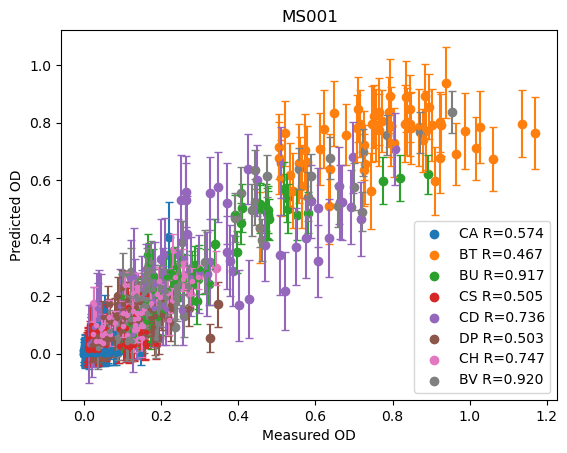

Total samples: 66, Initial regularization: 0.00e+00
Loss: 10.634, Residuals: -0.297
Loss: 5.006, Residuals: -0.077
Loss: 2.976, Residuals: 0.017
Loss: 2.654, Residuals: -0.043
Loss: 2.200, Residuals: -0.040
Loss: 2.122, Residuals: -0.034
Loss: 1.986, Residuals: -0.029
Loss: 1.950, Residuals: -0.022
Loss: 1.887, Residuals: -0.014
Loss: 1.791, Residuals: -0.009
Loss: 1.788, Residuals: -0.004
Loss: 1.756, Residuals: -0.008
Loss: 1.746, Residuals: 0.000
Loss: 1.728, Residuals: -0.004
Loss: 1.698, Residuals: -0.013
Loss: 1.694, Residuals: -0.017
Loss: 1.686, Residuals: -0.020
Loss: 1.672, Residuals: -0.024
Loss: 1.670, Residuals: -0.020
Loss: 1.652, Residuals: -0.027
Loss: 1.651, Residuals: -0.027
Loss: 1.649, Residuals: -0.028
Loss: 1.635, Residuals: -0.033
Loss: 1.630, Residuals: -0.034
Loss: 1.619, Residuals: -0.037
Loss: 1.611, Residuals: -0.038
Loss: 1.595, Residuals: -0.042
Loss: 1.581, Residuals: -0.043
Loss: 1.580, Residuals: -0.043
Loss: 1.580, Residuals: -0.043
Loss: 1.553, Residu

Loss: 1.480, Residuals: -0.047
Loss: 1.479, Residuals: -0.046
Loss: 1.460, Residuals: -0.047
Loss: 1.460, Residuals: -0.047
Loss: 1.459, Residuals: -0.048
Loss: 1.458, Residuals: -0.048
Loss: 1.449, Residuals: -0.049
Loss: 1.448, Residuals: -0.050
Loss: 1.438, Residuals: -0.051
Loss: 1.438, Residuals: -0.052
Loss: 1.431, Residuals: -0.053
Loss: 1.430, Residuals: -0.053
Loss: 1.423, Residuals: -0.054
Loss: 1.423, Residuals: -0.054
Loss: 1.422, Residuals: -0.054
Loss: 1.419, Residuals: -0.055
Loss: 1.419, Residuals: -0.055
Loss: 1.418, Residuals: -0.055
Loss: 1.418, Residuals: -0.055
Loss: 1.414, Residuals: -0.056
Loss: 1.414, Residuals: -0.056
Loss: 1.414, Residuals: -0.056
Loss: 1.413, Residuals: -0.056
Loss: 1.411, Residuals: -0.057
Loss: 1.411, Residuals: -0.057
Loss: 1.409, Residuals: -0.057
Loss: 1.406, Residuals: -0.059
Loss: 1.406, Residuals: -0.059
Loss: 1.406, Residuals: -0.059
Loss: 1.406, Residuals: -0.058
Loss: 1.405, Residuals: -0.058
Loss: 1.405, Residuals: -0.058
Loss: 1.

Total samples: 67, Updated regularization: 1.45e-01
Loss: 263.309, Residuals: -0.027
Loss: 263.085, Residuals: -0.027
Loss: 263.074, Residuals: -0.026
Optimization terminated successfully.
Evidence 1073.946
Pass count  1
Total samples: 66, Initial regularization: 0.00e+00
Loss: 10.693, Residuals: -0.313
Loss: 5.055, Residuals: -0.069
Loss: 3.196, Residuals: -0.031
Loss: 2.467, Residuals: -0.006
Loss: 2.097, Residuals: -0.006
Loss: 2.037, Residuals: -0.000
Loss: 1.937, Residuals: -0.006
Loss: 1.797, Residuals: -0.013
Loss: 1.784, Residuals: 0.005
Loss: 1.759, Residuals: 0.002
Loss: 1.717, Residuals: -0.007
Loss: 1.707, Residuals: -0.013
Loss: 1.690, Residuals: -0.017
Loss: 1.678, Residuals: -0.015
Loss: 1.659, Residuals: -0.022
Loss: 1.658, Residuals: -0.020
Loss: 1.651, Residuals: -0.023
Loss: 1.639, Residuals: -0.028
Loss: 1.638, Residuals: -0.027
Loss: 1.637, Residuals: -0.028
Loss: 1.622, Residuals: -0.036
Loss: 1.620, Residuals: -0.034
Loss: 1.617, Residuals: -0.035
Loss: 1.592, Re

Total samples: 67, Updated regularization: 1.56e-01
Loss: 133.718, Residuals: -0.024
Loss: 132.873, Residuals: -0.027
Loss: 131.972, Residuals: -0.027
Loss: 131.089, Residuals: -0.022
Loss: 131.066, Residuals: -0.024
Optimization terminated successfully.
Evidence 973.875
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.90e-01
Loss: 228.923, Residuals: -0.017
Optimization terminated successfully.
Evidence 1047.419
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.10e-01
Loss: 258.539, Residuals: -0.021
Loss: 257.724, Residuals: -0.022
Loss: 257.161, Residuals: -0.024
Loss: 257.109, Residuals: -0.024
Loss: 257.009, Residuals: -0.024
Loss: 256.834, Residuals: -0.024
Loss: 256.587, Residuals: -0.023
Loss: 256.575, Residuals: -0.024
Optimization terminated successfully.
Evidence 1058.090
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.21e-01
Loss: 264.228, Residuals: -0.023
Loss: 264.095, Residuals: -0.025
Loss: 263.

Loss: 263.853, Residuals: -0.041
Loss: 263.232, Residuals: -0.040
Loss: 263.206, Residuals: -0.040
Optimization terminated successfully.
Evidence 1045.590
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.98e-02
Loss: 265.882, Residuals: -0.040
Optimization terminated successfully.
Evidence 1046.985
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.98e-02
Loss: 266.888, Residuals: -0.043
Loss: 266.792, Residuals: -0.041
Loss: 266.650, Residuals: -0.041
Loss: 265.589, Residuals: -0.039
Loss: 265.584, Residuals: -0.038
Optimization terminated successfully.
Evidence 1048.321
Updating hyper-parameters...
Total samples: 67, Updated regularization: 1.99e-02
Loss: 266.471, Residuals: -0.040
Loss: 266.253, Residuals: -0.039
Loss: 265.858, Residuals: -0.038
Loss: 265.857, Residuals: -0.038
Optimization terminated successfully.
Evidence 1049.685
Updating hyper-parameters...
Total samples: 67, Updated regularization: 2.00e-02
Loss: 266.789, Residual

Loss: 1.391, Residuals: -0.058
Loss: 1.391, Residuals: -0.058
Loss: 1.388, Residuals: -0.059
Loss: 1.388, Residuals: -0.059
Loss: 1.385, Residuals: -0.059
Loss: 1.382, Residuals: -0.060
Loss: 1.382, Residuals: -0.059
Loss: 1.382, Residuals: -0.060
Loss: 1.382, Residuals: -0.060
Loss: 1.381, Residuals: -0.061
Loss: 1.379, Residuals: -0.061
Loss: 1.379, Residuals: -0.061
Loss: 1.377, Residuals: -0.061
Loss: 1.373, Residuals: -0.063
Loss: 1.373, Residuals: -0.062
Loss: 1.373, Residuals: -0.062
Loss: 1.371, Residuals: -0.064
Loss: 1.371, Residuals: -0.064
Loss: 1.370, Residuals: -0.064
Loss: 1.370, Residuals: -0.064
Loss: 1.368, Residuals: -0.065
Loss: 1.368, Residuals: -0.065
Loss: 1.367, Residuals: -0.065
Loss: 1.367, Residuals: -0.065
Loss: 1.367, Residuals: -0.065
Loss: 1.366, Residuals: -0.066
Loss: 1.366, Residuals: -0.066
Loss: 1.365, Residuals: -0.066
Loss: 1.365, Residuals: -0.066
Loss: 1.365, Residuals: -0.066
Loss: 1.365, Residuals: -0.066
Loss: 1.365, Residuals: -0.066
Loss: 1.

Total samples: 68, Initial regularization: 0.00e+00
Loss: 10.704, Residuals: -0.316
Loss: 5.178, Residuals: -0.066
Loss: 2.995, Residuals: 0.023
Loss: 2.626, Residuals: -0.023
Loss: 2.107, Residuals: -0.000
Loss: 1.942, Residuals: -0.040
Loss: 1.853, Residuals: -0.014
Loss: 1.726, Residuals: -0.004
Loss: 1.710, Residuals: 0.002
Loss: 1.680, Residuals: -0.002
Loss: 1.634, Residuals: -0.009
Loss: 1.628, Residuals: -0.008
Loss: 1.617, Residuals: -0.010
Loss: 1.599, Residuals: -0.015
Loss: 1.594, Residuals: -0.014
Loss: 1.585, Residuals: -0.018
Loss: 1.584, Residuals: -0.017
Loss: 1.579, Residuals: -0.019
Loss: 1.570, Residuals: -0.024
Loss: 1.568, Residuals: -0.023
Loss: 1.564, Residuals: -0.026
Loss: 1.557, Residuals: -0.031
Loss: 1.557, Residuals: -0.031
Loss: 1.553, Residuals: -0.034
Loss: 1.552, Residuals: -0.035
Loss: 1.550, Residuals: -0.037
Loss: 1.549, Residuals: -0.037
Loss: 1.547, Residuals: -0.039
Loss: 1.545, Residuals: -0.039
Loss: 1.530, Residuals: -0.047
Loss: 1.520, Residu

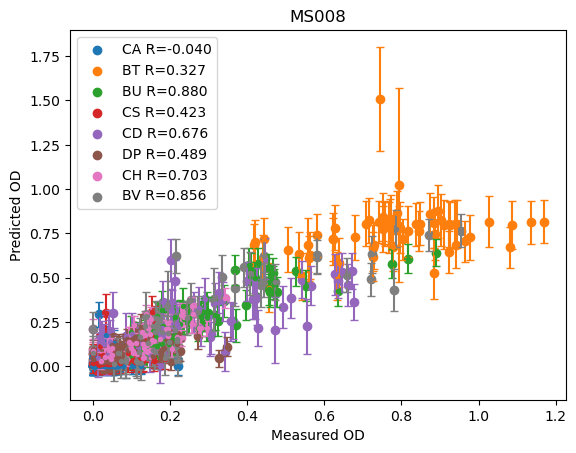

Total samples: 64, Initial regularization: 0.00e+00
Loss: 11.412, Residuals: -0.303
Loss: 5.464, Residuals: -0.068
Loss: 3.218, Residuals: 0.018
Loss: 2.958, Residuals: -0.000
Loss: 2.597, Residuals: 0.002
Loss: 2.114, Residuals: 0.019
Loss: 2.042, Residuals: 0.041
Loss: 1.923, Residuals: 0.027
Loss: 1.805, Residuals: 0.019
Loss: 1.776, Residuals: 0.018
Loss: 1.759, Residuals: 0.015
Loss: 1.744, Residuals: -0.011
Loss: 1.718, Residuals: -0.015
Loss: 1.676, Residuals: -0.024
Loss: 1.675, Residuals: -0.021
Loss: 1.672, Residuals: -0.021
Loss: 1.647, Residuals: -0.025
Loss: 1.644, Residuals: -0.018
Loss: 1.640, Residuals: -0.020
Loss: 1.632, Residuals: -0.022
Loss: 1.618, Residuals: -0.026
Loss: 1.618, Residuals: -0.025
Loss: 1.611, Residuals: -0.027
Loss: 1.607, Residuals: -0.027
Loss: 1.606, Residuals: -0.027
Loss: 1.599, Residuals: -0.029
Loss: 1.599, Residuals: -0.028
Loss: 1.588, Residuals: -0.032
Loss: 1.588, Residuals: -0.032
Optimization terminated successfully.
Evidence -47.411
U

Loss: 32.157, Residuals: -0.023
Loss: 31.563, Residuals: -0.011
Loss: 31.405, Residuals: -0.016
Loss: 31.108, Residuals: -0.014
Loss: 30.569, Residuals: -0.011
Loss: 30.044, Residuals: -0.000
Loss: 30.034, Residuals: -0.003
Optimization terminated successfully.
Evidence 619.513
Updating hyper-parameters...
Total samples: 66, Updated regularization: 4.61e-01
Loss: 124.043, Residuals: -0.004
Loss: 123.720, Residuals: -0.008
Loss: 123.235, Residuals: -0.011
Loss: 122.822, Residuals: -0.013
Loss: 122.748, Residuals: -0.012
Loss: 122.621, Residuals: -0.012
Loss: 122.602, Residuals: -0.011
Loss: 122.567, Residuals: -0.011
Loss: 122.506, Residuals: -0.011
Loss: 122.504, Residuals: -0.011
Optimization terminated successfully.
Evidence 958.364
Updating hyper-parameters...
Total samples: 66, Updated regularization: 5.91e-01
Loss: 222.681, Residuals: -0.009
Optimization terminated successfully.
Evidence 1032.287
Updating hyper-parameters...
Total samples: 66, Updated regularization: 6.40e-01
Loss

Loss: 221.204, Residuals: 0.003
Loss: 221.066, Residuals: -0.001
Loss: 220.805, Residuals: -0.001
Loss: 220.348, Residuals: -0.002
Loss: 220.345, Residuals: -0.002
Optimization terminated successfully.
Evidence 1030.718
Updating hyper-parameters...
Total samples: 66, Updated regularization: 1.72e+00
Loss: 254.671, Residuals: -0.003
Loss: 254.239, Residuals: -0.006
Loss: 254.237, Residuals: -0.005
Optimization terminated successfully.
Evidence 1039.189
Updating hyper-parameters...
Total samples: 66, Updated regularization: 1.74e+00
Loss: 260.656, Residuals: -0.011
Loss: 260.639, Residuals: -0.010
Optimization terminated successfully.
Evidence 1040.846
Updating hyper-parameters...
Total samples: 66, Updated regularization: 1.73e+00
Loss: 262.342, Residuals: -0.007
Optimization terminated successfully.
Evidence 1041.302
Pass count  1
Total samples: 66, Initial regularization: 0.00e+00
Loss: 11.389, Residuals: -0.320
Loss: 5.429, Residuals: -0.062
Loss: 3.530, Residuals: -0.020
Loss: 3.008

Total samples: 65, Updated regularization: 4.03e-02
Loss: 223.596, Residuals: -0.009
Loss: 223.223, Residuals: -0.014
Loss: 222.667, Residuals: -0.015
Loss: 222.657, Residuals: -0.015
Optimization terminated successfully.
Evidence 1013.550
Updating hyper-parameters...
Total samples: 65, Updated regularization: 4.22e-02
Loss: 252.436, Residuals: -0.016
Loss: 252.147, Residuals: -0.017
Loss: 252.134, Residuals: -0.017
Optimization terminated successfully.
Evidence 1019.719
Updating hyper-parameters...
Total samples: 65, Updated regularization: 4.25e-02
Loss: 257.547, Residuals: -0.019
Loss: 257.531, Residuals: -0.019
Optimization terminated successfully.
Evidence 1020.900
Updating hyper-parameters...
Total samples: 65, Updated regularization: 4.25e-02
Loss: 258.748, Residuals: -0.019
Loss: 258.685, Residuals: -0.019
Loss: 258.673, Residuals: -0.020
Loss: 258.654, Residuals: -0.020
Loss: 258.629, Residuals: -0.020
Loss: 258.628, Residuals: -0.020
Optimization terminated successfully.
Evid

Loss: 261.213, Residuals: -0.032
Loss: 260.897, Residuals: -0.033
Loss: 260.887, Residuals: -0.033
Optimization terminated successfully.
Evidence 1040.208
Pass count  1
Total samples: 67, Initial regularization: 0.00e+00
Loss: 11.842, Residuals: -0.315
Loss: 5.651, Residuals: -0.074
Loss: 3.215, Residuals: 0.007
Loss: 2.929, Residuals: -0.022
Loss: 2.409, Residuals: -0.012
Loss: 2.223, Residuals: 0.011
Loss: 1.924, Residuals: 0.007
Loss: 1.826, Residuals: 0.006
Loss: 1.724, Residuals: 0.008
Loss: 1.697, Residuals: -0.002
Loss: 1.655, Residuals: -0.012
Loss: 1.652, Residuals: -0.010
Loss: 1.628, Residuals: -0.019
Loss: 1.623, Residuals: -0.024
Loss: 1.614, Residuals: -0.027
Loss: 1.597, Residuals: -0.031
Loss: 1.597, Residuals: -0.029
Loss: 1.581, Residuals: -0.033
Loss: 1.581, Residuals: -0.033
Loss: 1.580, Residuals: -0.032
Loss: 1.579, Residuals: -0.032
Loss: 1.568, Residuals: -0.035
Loss: 1.568, Residuals: -0.036
Loss: 1.568, Residuals: -0.034
Loss: 1.564, Residuals: -0.036
Loss: 1.

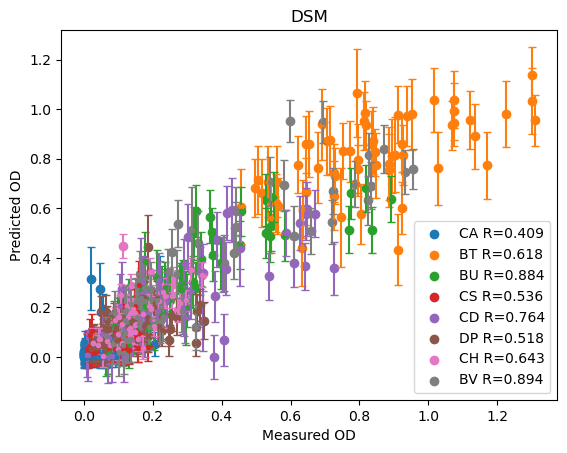

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=10, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(dfs):
        #train_index, test_index = next(iter(kf.split(dfs)))

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit()

        # plot fitness to data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        strain = file.split("_")[0]
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_kfold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_kfold.pdf", dpi=300)
    plt.show()

In [5]:
kfold_df

,Treatments,species,true,pred,stdv
0,CH-DP-BV-CA,CA,0.002133,0.022640,0.036836
1,CH-DP-BV-CA,DP,0.037247,0.061201,0.061552
2,CH-DP-BV-CA,CH,0.235187,0.246658,0.047619
3,CH-DP-BV-CA,BV,0.786432,0.697622,0.092478
4,CH-DP-BV-CA,CA,0.036395,0.059902,0.040829
...,...,...,...,...,...
509,DSM27147-DP-BT-BV-CA,CA,0.028325,0.018106,0.034935
510,DSM27147-DP-BT-BV-CA,BT,0.816925,0.982887,0.129318
511,DSM27147-DP-BT-BV-CA,CD,0.119845,0.141521,0.111710
512,DSM27147-DP-BT-BV-CA,DP,0.175360,0.128343,0.063310


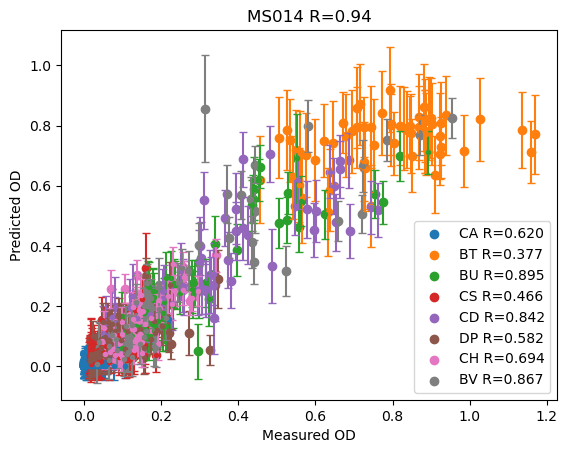

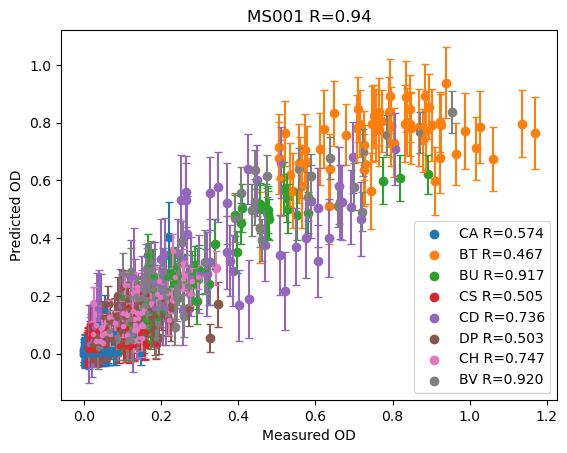

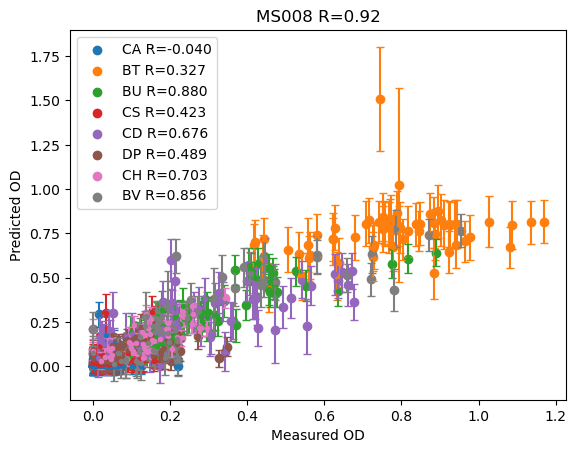

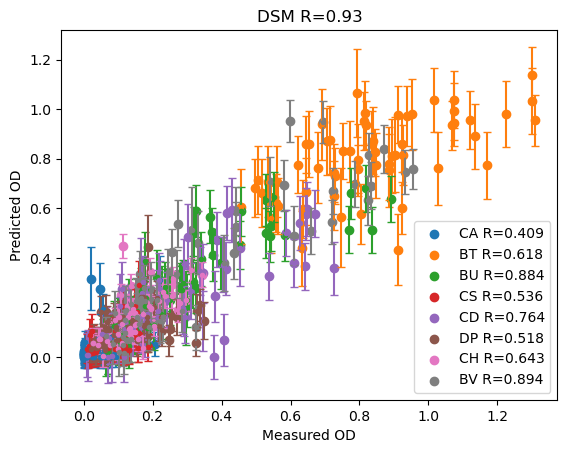

In [6]:
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]
    
    strain = file.split("_")[0]
    kfold_df = pd.read_csv(f"kfold/{strain}_kfold.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.savefig(f"figures/{strain}_kfold.pdf", dpi=300)
    plt.show()